In [58]:

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal
from scipy import ndimage


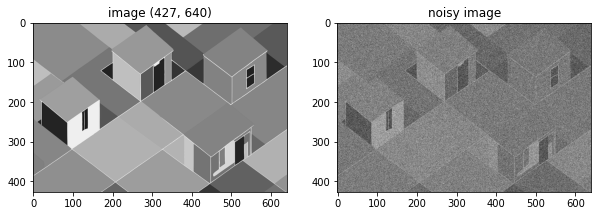

In [56]:
# Read image
img = io.imread("imgs/houses.png")
img = np.sum(img, axis=2)
img = img / np.max(img)

# Add gaussian noise
# mean=0.5 and var=0.2
noise = np.random.normal(0.5, 0.2, img.shape)
img_noisy = img + noise
img_noisy = img_noisy / np.max(img_noisy)

fig, axisarray = plt.subplots(1, 2, figsize=(10,10))
axisarray[0].set_title(f"image {img.shape}")
axisarray[0].imshow(img, cmap='gray')
axisarray[1].set_title(f"noisy image")
axisarray[1].imshow(img_noisy, cmap='gray')

img = img_noisy


sub image mean = 0.5537205050183474
sub image variance = 0.007572345391408467


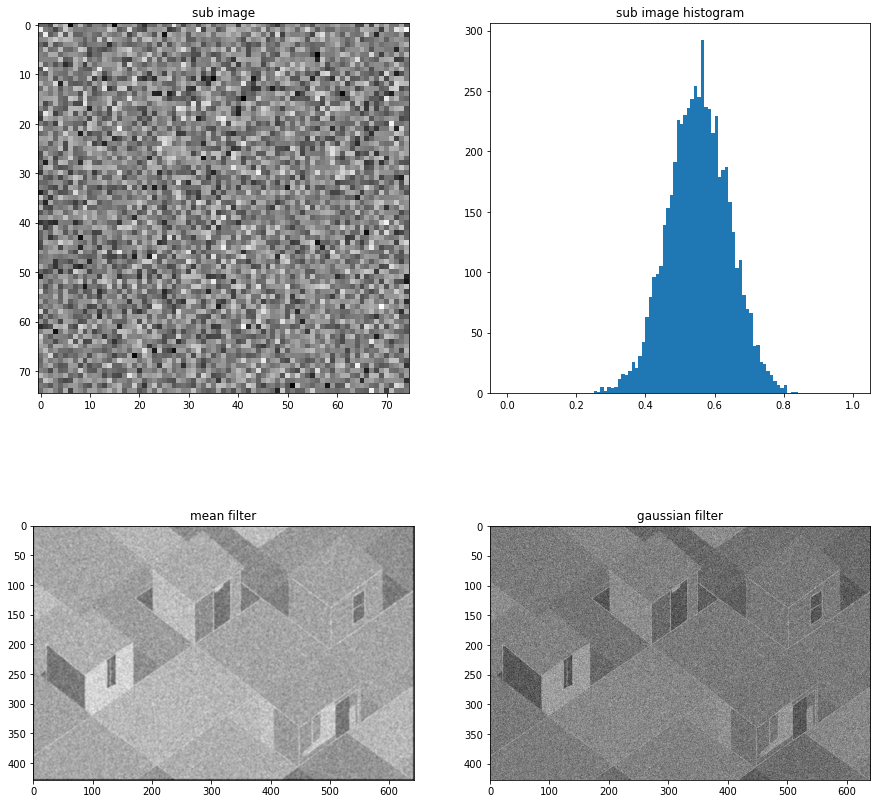

In [66]:

subimg = img[275:350, 175:250]

mean = np.mean(subimg)
var = np.var(subimg)
print(f"sub image mean = {mean}")
print(f"sub image variance = {var}")

kernel_mean = np.ones((3,3))
img_filter_mean = signal.convolve2d(img, kernel_mean)

img_filter_gaussian = ndimage.gaussian_filter(img, sigma=var)

fig, axisarray = plt.subplots(2, 2, figsize=(15,15))

subimg_hstack = np.hstack(subimg)
axisarray[0,0].set_title('sub image')
axisarray[0,0].imshow(subimg, cmap='gray')
axisarray[0,1].set_title('sub image histogram')
axisarray[0,1].hist(subimg_hstack, range=[0, 1], bins=100)

axisarray[1,0].set_title('mean filter')
axisarray[1,0].imshow(img_filter_mean, cmap='gray')
axisarray[1,1].set_title('gaussian filter')
axisarray[1,1].imshow(img_filter_gaussian, cmap='gray')
